In [ ]:
!pip install seaborn

In [ ]:
import seaborn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
from pandas.plotting import table
import scipy
from scipy.stats import pearsonr, spearmanr
# from wordcloud import WordCloud, STOPWORDS
import datetime as dt
# import plotly
# import cufflinks as cf
# import plotly.offline
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)
# Load data


**cohort correction**

In [ ]:
master = pd.read_csv('../processed_mastersheet1025.zip')
master = master.drop(master[master.percent_fulfilled >= 1.0].index)
master.head(10)

,Unnamed: 0,projectid,teacher_acctid,schoolid,school_state,school_metro,school_charter,teacher_prefix,teacher_teach_for_america,primary_focus_subject,...,num_donors,num_teachers,total_donation_amount,avg_msg_num_words,fully_funded,day_of_week_posted,percent_fulfilled,amount_remaining,school_pct_funded,teacher_pct_funded
0,0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,IL,suburban,f,Mrs.,f,Special Needs,...,1.0,0.0,42.50,30.0,t,1,0.095643,401.86,0.500000,0.0
1,1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,ID,urban,f,Mrs.,f,Mathematics,...,0.0,0.0,0.00,0.0,f,1,0.000000,233.24,0.500000,0.5
2,2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,NH,suburban,f,Mrs.,f,Environmental Science,...,0.0,0.0,0.00,0.0,f,1,0.000000,285.09,0.500000,0.5
3,3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,VA,urban,f,Ms.,f,Literacy,...,1.0,0.0,42.50,0.0,f,1,0.182450,190.44,0.541667,0.6
4,4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,IL,urban,f,Mr.,f,Environmental Science,...,0.0,0.0,0.00,0.0,t,1,0.000000,513.41,0.000000,0.0
5,5,c685c844476d7ed75bf87699eeafd682,4b19500fb087a635c98061505f1e6c6f,34c650f9f6d5c3e42b8e2169c280ecb7,SC,urban,f,Mrs.,f,Literature & Writing,...,2.0,0.0,42.50,24.5,f,1,0.061763,645.61,0.000000,0.0
6,6,a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,KY,urban,f,Mrs.,f,Literature & Writing,...,0.0,0.0,0.00,0.0,f,1,0.000000,935.16,0.625000,0.0
7,7,0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,FL,rural,f,Ms.,f,Literacy,...,2.0,1.0,709.75,9.5,t,1,0.876971,99.57,0.000000,0.0
11,11,c83d0794e67ec95f680cbb058c4523ff,535ab721f66316cf26a1d5ce1d9184f5,9f37b7e58dae8805882cbae215bb5e2a,FL,suburban,f,Mrs.,f,Applied Sciences,...,0.0,0.0,0.00,0.0,f,1,0.000000,269.90,0.000000,0.0
12,12,3b6bddd1df0e310066d81c2b89771b5c,60a251a9fe882561405e9f6e135afb75,cf7b5a7b866094184208f0f4bc282e6a,NM,urban,f,Mrs.,f,Civics & Government,...,0.0,0.0,0.00,0.0,t,1,0.000000,519.03,0.000000,0.0


In [ ]:
t_mask = (master['date_posted'] >= '2013-02-01') & (master['date_posted'] <= '2013-07-31')
v_mask = (master['date_posted'] >= '2013-12-01') & (master['date_posted'] <= '2013-12-31')
train, validation = master.loc[t_mask], master.loc[v_mask]

In [ ]:
def run_baseline1(df, k):
  if k == 0.0:
      precision, recall = 1, 0
  else:
      df.sort_values(by=['total_price_excluding_optional_support'], ascending = False, inplace = True)
      br = df['fully_funded'].value_counts().f / df.shape[0]
      if k == 1.0:
        precision, recall = br, 1
      else:
        sub = df.head(int(df.shape[0] * k)) # predict these as 1: not fully_funded, or 'f'
        rem = df.tail(df.shape[0] - int(df.shape[0] * k))
        tp = sub['fully_funded'].value_counts().f
        fp = sub.shape[0] - tp
        fn = rem['fully_funded'].value_counts().f
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
  if k == 0.1:
    print('@k={:.2f}, precision={:.3f}, recall={:.3f}'.format(k, precision, recall))
  return precision, recall

In [ ]:
grid = np.arange(0,1.1,0.1)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  tmp = run_baseline1(validation, k)
  pre_log[i], rec_log[i] = tmp[0], tmp[1]

@k=0.10, precision=0.720, recall=0.174


<ipython-input-5-ef26f29704e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['total_price_excluding_optional_support'], ascending = False, inplace = True)


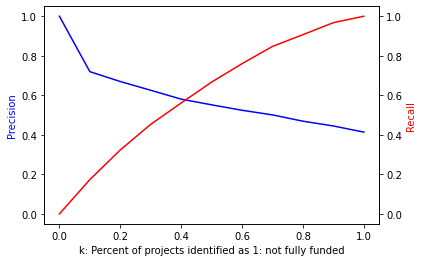

In [ ]:
# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import confusion_matrix
# from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, roc_curve

**Inprocessing**

In [ ]:
master = pd.read_csv('../processed_mastersheet1025.zip')
master = master.drop(master[master.percent_fulfilled >= 1.0].index)
master.head(10)

,Unnamed: 0,projectid,teacher_acctid,schoolid,school_state,school_metro,school_charter,teacher_prefix,teacher_teach_for_america,primary_focus_subject,...,num_donors,num_teachers,total_donation_amount,avg_msg_num_words,fully_funded,day_of_week_posted,percent_fulfilled,amount_remaining,school_pct_funded,teacher_pct_funded
0,0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,IL,suburban,f,Mrs.,f,Special Needs,...,1.0,0.0,42.50,30.0,t,1,0.095643,401.86,0.500000,0.0
1,1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,ID,urban,f,Mrs.,f,Mathematics,...,0.0,0.0,0.00,0.0,f,1,0.000000,233.24,0.500000,0.5
2,2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,NH,suburban,f,Mrs.,f,Environmental Science,...,0.0,0.0,0.00,0.0,f,1,0.000000,285.09,0.500000,0.5
3,3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,VA,urban,f,Ms.,f,Literacy,...,1.0,0.0,42.50,0.0,f,1,0.182450,190.44,0.541667,0.6
4,4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,IL,urban,f,Mr.,f,Environmental Science,...,0.0,0.0,0.00,0.0,t,1,0.000000,513.41,0.000000,0.0
5,5,c685c844476d7ed75bf87699eeafd682,4b19500fb087a635c98061505f1e6c6f,34c650f9f6d5c3e42b8e2169c280ecb7,SC,urban,f,Mrs.,f,Literature & Writing,...,2.0,0.0,42.50,24.5,f,1,0.061763,645.61,0.000000,0.0
6,6,a4b234feb2b72921ed59850d5c873d62,620982375045fa11d872702f26ab98bb,da1985df161ba5c3842fc99579b6e4b1,KY,urban,f,Mrs.,f,Literature & Writing,...,0.0,0.0,0.00,0.0,f,1,0.000000,935.16,0.625000,0.0
7,7,0ff5dec32bf793243a8b0b2c023a81f0,ec5b110df87bd511b508961676d08b6c,72e2b0cb2eecfdc37e67e0eaf10da07b,FL,rural,f,Ms.,f,Literacy,...,2.0,1.0,709.75,9.5,t,1,0.876971,99.57,0.000000,0.0
11,11,c83d0794e67ec95f680cbb058c4523ff,535ab721f66316cf26a1d5ce1d9184f5,9f37b7e58dae8805882cbae215bb5e2a,FL,suburban,f,Mrs.,f,Applied Sciences,...,0.0,0.0,0.00,0.0,f,1,0.000000,269.90,0.000000,0.0
12,12,3b6bddd1df0e310066d81c2b89771b5c,60a251a9fe882561405e9f6e135afb75,cf7b5a7b866094184208f0f4bc282e6a,NM,urban,f,Mrs.,f,Civics & Government,...,0.0,0.0,0.00,0.0,t,1,0.000000,519.03,0.000000,0.0


In [ ]:
master['date_posted'] = pd.to_datetime(master['date_posted'])
master.fully_funded = master.fully_funded.replace({'f':1, 't':0})
master.head(2)

,Unnamed: 0,projectid,teacher_acctid,schoolid,school_state,school_metro,school_charter,teacher_prefix,teacher_teach_for_america,primary_focus_subject,...,num_donors,num_teachers,total_donation_amount,avg_msg_num_words,fully_funded,day_of_week_posted,percent_fulfilled,amount_remaining,school_pct_funded,teacher_pct_funded
0,0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,IL,suburban,f,Mrs.,f,Special Needs,...,1.0,0.0,42.5,30.0,0,1,0.095643,401.86,0.5,0.0
1,1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,ID,urban,f,Mrs.,f,Mathematics,...,0.0,0.0,0.0,0.0,1,1,0.000000,233.24,0.5,0.5


 Convert Categorical data

In [ ]:
import collections
def getMap(name):
    tmp = dict(master[name].value_counts())
    freq = list(reversed(sorted([tmp[i] for i in tmp])))
    res = collections.defaultdict(int)
    for key, val in tmp.items():
      res[key] = freq.index(val)
    return res


In [ ]:
code_school_state = master["school_state"].map(getMap('school_state'))
code_school_state = code_school_state.fillna(code_school_state.mean())


In [ ]:
code_school_metro = master['school_metro'].map(getMap('school_metro'))
code_school_metro = code_school_metro.fillna(code_school_metro.mean())

In [ ]:
code_school_charter = master['school_charter'].map(getMap('school_charter'))

In [ ]:
code_teacher_prefix = master['teacher_prefix'].map(getMap('teacher_prefix'))

In [ ]:
code_teacher_teach_for_america = master['teacher_teach_for_america'].map(getMap('teacher_teach_for_america'))

In [ ]:
code_primary_focus_subject = master['primary_focus_subject'].map(getMap('primary_focus_subject'))

In [ ]:
code_resource_type = master['resource_type'].map(getMap('resource_type'))

In [ ]:
code_poverty_level = master['poverty_level'].map(getMap('poverty_level'))

In [ ]:
code_grade_level = master['grade_level'].map(getMap('grade_level'))

In [ ]:
code_day_of_week_posted = master['day_of_week_posted'].map(getMap('day_of_week_posted'))

In [ ]:
norm_code_school_state = (code_school_state - code_school_state.mean()) / code_school_state.std()
norm_code_school_metro = (code_school_metro - code_school_metro.mean()) / code_school_metro.std()
norm_code_school_charter = (code_school_charter - code_school_charter.mean()) / code_school_charter.std()
norm_code_teacher_prefix = (code_teacher_prefix - code_teacher_prefix.mean()) / code_teacher_prefix.std()
norm_code_teacher_teach_for_america = (code_teacher_teach_for_america - code_teacher_teach_for_america.mean()) / code_teacher_teach_for_america.std()
norm_code_primary_focus_subject = (code_primary_focus_subject - code_primary_focus_subject.mean()) / code_primary_focus_subject.std()
norm_code_resource_type = (code_resource_type - code_resource_type.mean()) / code_resource_type.std()
norm_code_poverty_level = (code_poverty_level - code_poverty_level.mean()) / code_poverty_level.std()
norm_code_grade_level = (code_grade_level - code_grade_level.mean()) / code_grade_level.std()
norm_code_day_of_week_posted = (code_day_of_week_posted - code_day_of_week_posted.mean()) / code_day_of_week_posted.std()

In [ ]:
norm_code_teacher_prefix.isna().sum()

0

In [ ]:
num_features = master[['total_price_excluding_optional_support','students_reached','title_num_words','description_num_words','statement_num_words','essay_num_words','num_donors','num_teachers','avg_msg_num_words','percent_fulfilled','amount_remaining','school_pct_funded','teacher_pct_funded']]
labels = master['fully_funded']

In [ ]:
num_features.head()

,total_price_excluding_optional_support,students_reached,title_num_words,description_num_words,statement_num_words,essay_num_words,num_donors,num_teachers,avg_msg_num_words,percent_fulfilled,amount_remaining,school_pct_funded,teacher_pct_funded
0,444.36,7.0,8.0,33.0,10.0,220.0,1.0,0.0,30.0,0.095643,401.86,0.500000,0.0
1,233.24,30.0,3.0,33.0,14.0,175.0,0.0,0.0,0.0,0.000000,233.24,0.500000,0.5
2,285.09,230.0,3.0,35.0,29.0,390.0,0.0,0.0,0.0,0.000000,285.09,0.500000,0.5
3,232.94,18.0,3.0,34.0,18.0,187.0,1.0,0.0,0.0,0.182450,190.44,0.541667,0.6
4,513.41,70.0,3.0,35.0,30.0,347.0,0.0,0.0,0.0,0.000000,513.41,0.000000,0.0


In [ ]:
num_features['total_price_excluding_optional_support'] = num_features['total_price_excluding_optional_support'].clip(upper = 2000)
num_features['students_reached'] = num_features['students_reached'].clip(upper = 200)
num_features['statement_num_words'] = num_features['statement_num_words'].clip(upper = 250)
num_features['num_donors'] = num_features['num_donors'].clip(upper = 10)
num_features['num_teachers'] = num_features['num_teachers'].clip(upper = 5)
num_features['avg_msg_num_words'] = num_features['avg_msg_num_words'].clip(upper = 100)
num_features['amount_remaining'] = num_features['amount_remaining'].clip(upper = 2000)

<ipython-input-27-a35403248c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features['total_price_excluding_optional_support'] = num_features['total_price_excluding_optional_support'].clip(upper = 2000)
<ipython-input-27-a35403248c38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features['students_reached'] = num_features['students_reached'].clip(upper = 200)
<ipython-input-27-a35403248c38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
norm_num_features = (num_features - num_features.mean())/num_features.std()

In [ ]:
norm_num_features.isna().sum()

total_price_excluding_optional_support       0
students_reached                           116
title_num_words                             15
description_num_words                       89
statement_num_words                       1292
essay_num_words                              3
num_donors                                   0
num_teachers                                 0
avg_msg_num_words                            0
percent_fulfilled                          299
amount_remaining                             0
school_pct_funded                            0
teacher_pct_funded                           0
dtype: int64

In [ ]:
norm_num_features['students_reached'] = norm_num_features['students_reached'].fillna(norm_num_features['students_reached'].mean())
norm_num_features['title_num_words'] = norm_num_features['title_num_words'].fillna(norm_num_features['title_num_words'].mean())
norm_num_features['description_num_words'] = norm_num_features['description_num_words'].fillna(norm_num_features['description_num_words'].mean())
norm_num_features['statement_num_words'] = norm_num_features['statement_num_words'].fillna(norm_num_features['statement_num_words'].mean())
norm_num_features['percent_fulfilled'] = norm_num_features['percent_fulfilled'].fillna(norm_num_features['percent_fulfilled'].mean())
norm_num_features['essay_num_words'] = norm_num_features['essay_num_words'].fillna(norm_num_features['essay_num_words'].mean())


In [ ]:
norm_num_features.isna().sum()

total_price_excluding_optional_support    0
students_reached                          0
title_num_words                           0
description_num_words                     0
statement_num_words                       0
essay_num_words                           0
num_donors                                0
num_teachers                              0
avg_msg_num_words                         0
percent_fulfilled                         0
amount_remaining                          0
school_pct_funded                         0
teacher_pct_funded                        0
dtype: int64

In [ ]:
from scipy.sparse import hstack
features = pd.concat([norm_num_features, norm_code_school_state, norm_code_school_metro, norm_code_school_charter, norm_code_teacher_prefix, norm_code_teacher_teach_for_america, norm_code_primary_focus_subject, norm_code_resource_type, norm_code_poverty_level,norm_code_grade_level, norm_code_day_of_week_posted], axis = 1)
features.shape

(526994, 23)

In [ ]:
features.head(2)

,total_price_excluding_optional_support,students_reached,title_num_words,description_num_words,statement_num_words,essay_num_words,num_donors,num_teachers,avg_msg_num_words,percent_fulfilled,...,school_state,school_metro,school_charter,teacher_prefix,teacher_teach_for_america,primary_focus_subject,resource_type,poverty_level,grade_level,day_of_week_posted
0,-0.139166,-0.942839,1.203844,-0.477753,-1.085948,-0.657773,0.198050,-0.260987,3.202386,0.230526,...,-0.601811,0.740863,-0.300254,-0.920449,-0.235718,-0.245134,1.841029,1.729966,-0.091199,-0.847185
1,-0.767361,-0.568445,-0.960139,-0.477753,-0.636043,-1.159820,-0.402367,-0.260987,-0.425502,-0.376891,...,2.848099,-0.673975,-0.300254,-0.920449,-0.235718,-0.429571,-1.072358,0.490380,-0.091199,-0.847185


In [ ]:
t_mask = (master['date_posted'] >= '2013-02-01') & (master['date_posted'] <= '2013-07-31')
v_mask = (master['date_posted'] >= '2013-12-01') & (master['date_posted'] <= '2013-12-31')

In [ ]:
data_train, x_train, Y_train = master.loc[t_mask], features.loc[t_mask], labels.loc[t_mask]
data_test, x_test, Y_test = master.loc[v_mask], features.loc[v_mask], labels.loc[v_mask]

In [ ]:
# import sys
# sys.path.append('/content/drive/MyDrive/10718_Fall21/')
# # drive/MyDrive/10718_Fall21/

**Best RandomForest before In Precessing**

In [ ]:
def prk(df, k):
  if k == 0.0:
      precision, recall = 1, 0
  else:
      df.sort_values(by=['pred'], ascending = False, inplace = True)
      br = df['fully_funded'].sum() / df.shape[0]
      if k == 1.0:
        precision, recall = br, 1
      else:
        sub = df.head(int(df.shape[0] * k)) # predict these as 1: not fully_funded, or 'f'
        rem = df.tail(df.shape[0] - int(df.shape[0] * k))
        tp = sub['fully_funded'].sum()
        fp = sub.shape[0] - tp
        fn = rem['fully_funded'].sum()
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
  # if k == 0.1:
  #   print('@k={:.2f}, precision={:.3f}, recall={:.3f}'.format(k, precision, recall))
  return precision, recall

train_auc_score = 0.99987, validation_auc_score = 0.80747
precision @ k = 0.7825464949928469


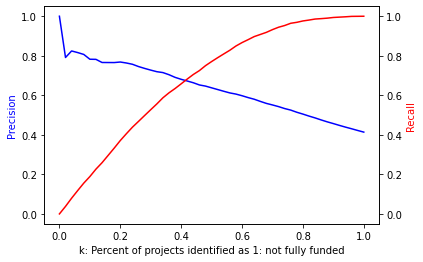

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

clf_rf = RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=0)
clf_rf.fit(x_train, Y_train)
y_train_pred =  clf_rf.predict_proba(x_train)[:,1]
y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
train_auc_score = roc_auc_score(Y_train,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

In [ ]:
print('percentage of 1: not fully funded = {}'.format(np.sum(Y_train.values) / np.size(Y_train.values)))

percentage of 1: not fully funded = 0.4067988833313947


## Disparity of vanilla model

In [ ]:
# What's FNR here should be TPR, which we find to provide stronger distinction across groups
def get_fnr_by_group(sensitive, labels, scores, k=0.1): 
    df_results = pd.DataFrame({'sensitive': sensitive,
                             'label': labels,
                             'score': scores})
    df_results.sort_values(by=['score'], ascending = False, inplace = True)
    pred_col = f'pred_@{k:.1f}'
    df_results[pred_col] = 0
    df_results.iloc[:int(len(df_results)*k)][pred_col] = 1
    fnr_by_group = df_results.groupby(sensitive).apply(lambda df: get_fnr(df, pred=pred_col))
    count_by_group = df_results.groupby(sensitive).size()
    return pd.DataFrame({'tpr': fnr_by_group,
                         'count': count_by_group})

def get_fnr_disparity(sensitive, protected_attr,
                      labels, scores, k=0.1): 
    assert protected_attr in sensitive.values
    df_results = pd.DataFrame({'sensitive': sensitive,
                             'label': labels,
                             'score': scores})
    df_results.sort_values(by=['score'], ascending = False, inplace = True)
    pred_col = f'pred_@{k:.1f}'
    df_results[pred_col] = 0
    df_results.iloc[:int(len(df_results)*k)][pred_col] = 1
    df_protected = df_results[(df_results.sensitive == protected_attr)]
    df_others = df_results[(df_results.sensitive != protected_attr)]
    fnr_protected = get_fnr(df_protected, pred=pred_col)
    fnr_others = get_fnr(df_others, pred=pred_col)
    return fnr_protected / fnr_others

def get_fnr(df, label='label', pred='pred'): 
    return df[(df[label] == 1) & (df[pred] == 1)].shape[0] / df[(df[label] == 1)].shape[0]

In [ ]:
# Difference in positive label across groups
data_train.groupby('poverty_level').fully_funded.mean()

poverty_level
high poverty        0.423834
highest poverty     0.385210
low poverty         0.471646
moderate poverty    0.445324
Name: fully_funded, dtype: float64

In [ ]:
data_train['low_poverty_level'] = data_train.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
data_train.groupby('low_poverty_level').fully_funded.mean()

<ipython-input-81-3c94eaf2922c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['low_poverty_level'] = data_train.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')


low_poverty_level
low        0.471646
not low    0.405406
Name: fully_funded, dtype: float64

In [ ]:
get_fnr_by_group(data_test['poverty_level'], Y_test, y_score)

<ipython-input-79-db1be18702da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


,tpr,count
poverty_level,,
high poverty,0.089646,1802
highest poverty,0.092212,4076
low poverty,0.142857,192
moderate poverty,0.090047,928


In [ ]:
data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
get_fnr_disparity(data_test['low_poverty_level'], 'low',
                  Y_test, y_score)

<ipython-input-83-e42a12aa051b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
<ipython-input-79-db1be18702da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


1.5669816564758199

In [ ]:
data_test['is_female'] = data_test.teacher_prefix.apply(lambda x: 'female' if x in ['Mrs.', 'Ms.'] else 'nonfemale')
get_fnr_disparity(data_test['is_female'], 'nonfemale',
                  Y_test, y_score)

<ipython-input-84-051a49a8d78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['is_female'] = data_test.teacher_prefix.apply(lambda x: 'female' if x in ['Mrs.', 'Ms.'] else 'nonfemale')
<ipython-input-79-db1be18702da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


0.9071900220102714

### fairlearn ###

In [ ]:
!pip install fairlearn

In [ ]:
data_train["low_poverty_level"]

79896     not low
79898     not low
79900     not low
79903     not low
79904     not low
           ...   
123163    not low
123164    not low
123166    not low
123168    not low
123169    not low
Name: low_poverty_level, Length: 34388, dtype: object

train_auc_score = 0.99648, validation_auc_score = 0.75135
precision @ k = 0.6909871244635193


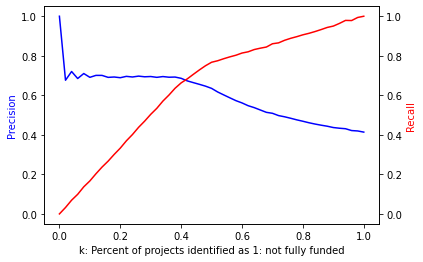

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

constraint = DemographicParity()
clf_rf = RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=0)
# clf_rf.fit(x_train, Y_train)

mitigator = ExponentiatedGradient(clf_rf, constraint)
mitigator.fit(x_train, Y_train, sensitive_features=data_train["low_poverty_level"])

#y_train_pred =  mitigator.predictors_.predict_proba(x_train)[:,1]
#y_test_pred =  mitigator.predictors_.predict_proba(x_test)[:,1]
y_train_pred =  mitigator._pmf_predict(x_train)[:,1]
y_test_pred =  mitigator._pmf_predict(x_test)[:,1]

train_auc_score = roc_auc_score(Y_train,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

In [ ]:
get_fnr_by_group(data_test['poverty_level'], Y_test, y_score)

<ipython-input-79-db1be18702da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


,tpr,count
poverty_level,,
high poverty,0.078283,1802
highest poverty,0.107788,4076
low poverty,0.090909,192
moderate poverty,0.094787,928


In [ ]:
data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
get_fnr_disparity(data_test['low_poverty_level'], 'low',
                  Y_test, y_score)

<ipython-input-94-e42a12aa051b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
<ipython-input-79-db1be18702da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


0.931900826446281

train_auc_score = 0.99389, validation_auc_score = 0.72711
precision @ k = 0.6452074391988555


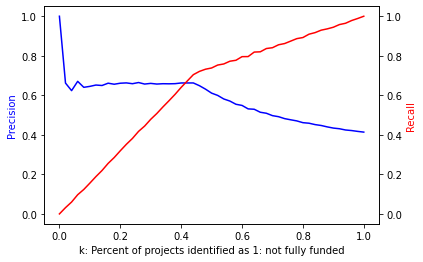

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

constraint = EqualizedOdds()
clf_rf = RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=0)
# clf_rf.fit(x_train, Y_train)

mitigator = ExponentiatedGradient(clf_rf, constraint)
mitigator.fit(x_train, Y_train, sensitive_features=data_train["low_poverty_level"])

#y_train_pred =  mitigator.predictors_.predict_proba(x_train)[:,1]
#y_test_pred =  mitigator.predictors_.predict_proba(x_test)[:,1]
y_train_pred =  mitigator._pmf_predict(x_train)[:,1]
y_test_pred =  mitigator._pmf_predict(x_test)[:,1]

train_auc_score = roc_auc_score(Y_train,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

In [ ]:
get_fnr_by_group(data_test['poverty_level'], Y_test, y_score)

<ipython-input-79-db1be18702da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


,tpr,count
poverty_level,,
high poverty,0.077020,1802
highest poverty,0.106542,4076
low poverty,0.038961,192
moderate poverty,0.082938,928


In [ ]:
data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
get_fnr_disparity(data_test['low_poverty_level'], 'low',
                  Y_test, y_score)

<ipython-input-97-e42a12aa051b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
<ipython-input-79-db1be18702da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.iloc[:int(len(df_results)*k)][pred_col] = 1


0.4113526922515687

## What we need is to make sure the proportion of label "1" in "not low" poverty level matches that in "low" poverty level

**Methods to achieve it**
1. Oversampling: 
    - Oversample label "1"'s from "not low" poverty level
    - Oversample label "0"'s from "low" poverty level
2. Undersampling: 
    - Undersample label "0"'s from "not low"
    - Undersample label "1" from "low"

In [ ]:
def oversample_label_from_feature(df, label, label_value, feature, feature_value): 
    assert isinstance(label_value, int) and isinstance(feature_value, int)
    not_feature_not_label_query = f'{label} != {label_value} and {feature} != {feature_value}'
    feature_not_label_query = f'{label} != {label_value} and {feature} == {feature_value}'
    feature_label_query = f'{label} == {label_value} and {feature} == {feature_value}'
    
    feature_query = f'{feature} == {feature_value}'
    not_feature_query = f'{feature} != {feature_value}'
    
    not_feature_not_label_pct = (df.query(not_feature_not_label_query).shape[0] / 
                                 df.query(not_feature_query).shape[0])
    feature_not_label_size = df.query(feature_not_label_query).shape[0]
    print(feature_not_label_query)
    print(feature_not_label_size)
    
    feature_size_before_oversampling = df.query(feature_query).shape[0]
    feature_size_after_oversampling = feature_not_label_size / not_feature_not_label_pct
    
    feature_label_oversampling_size = int(feature_size_after_oversampling - feature_size_before_oversampling)
    print(feature_label_oversampling_size)
    oversampled_rows = df.query(feature_label_query).sample(n=feature_label_oversampling_size)
    
    df_oversampled = pd.concat([df, oversampled_rows])
    return df_oversampled    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

def train_rf_clf(X, y, visualize=False): 

    # read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
    # 
    train_auc = []
    cv_auc = []

    clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
    clf_rf.fit(X, 
               y)
    y_train_pred =  clf_rf.predict_proba(x_train)[:,1]
    y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test, y_test_pred))
    print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

    y_score = pd.Series(y_test_pred)
    Y_test_np = Y_test.to_numpy()
    Y_test_pd = pd.Series(Y_test_np)
    combo = pd.concat([Y_test_pd, y_score], axis=1)
    combo.columns = ['fully_funded', 'pred']

    grid = np.arange(0,1.02,0.02)
    pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
    for i, k in enumerate(grid):
      pre_log[i], rec_log[i] = prk(combo, k)
      if k == 0.1:
        print('precision @ k = {}'.format(pre_log[i]))
        prec_k = pre_log[i]

    # f, axs = plt.subplots(1,2,figsize=(15,5))
    # axs1 = axs[0]
    if visualize: 
        f, axs1 = plt.subplots()
        axs2 = axs1.twinx()
        axs1.plot(grid, pre_log, 'b', label = 'Precision')
        axs2.plot(grid, rec_log, 'r', label = 'Recall')
        axs1.set_ylabel('Precision', color = 'b')
        axs1.set_ylim(-0.05,1.05)
        axs2.set_ylabel('Recall', color = 'r')
        axs2.set_ylim(-0.05,1.05)
        axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
        plt.show()
    
    return y_score, prec_k

In [ ]:
def undersample_label_from_feature(df, label, label_value, feature, feature_value): 
    assert isinstance(label_value, int) and isinstance(feature_value, int)
    not_feature_not_label_query = f'{label} != {label_value} and {feature} != {feature_value}'
    feature_not_label_query = f'{label} != {label_value} and {feature} == {feature_value}'
    feature_label_query = f'{label} == {label_value} and {feature} == {feature_value}'
    
    feature_query = f'{feature} == {feature_value}'
    not_feature_query = f'{feature} != {feature_value}'
    
    not_feature_not_label_pct = (df.query(not_feature_not_label_query).shape[0] / 
                                 df.query(not_feature_query).shape[0])
    feature_not_label_size = df.query(feature_not_label_query).shape[0]
    
    feature_size_before_undersampling = df.query(feature_query).shape[0]
    feature_size_after_undersampling = feature_not_label_size / not_feature_not_label_pct
    
    feature_label_undersampling_size = int(feature_size_before_undersampling - feature_size_after_undersampling)
    undersampled_rows = df.query(feature_label_query).sample(n=feature_label_undersampling_size)
    
    df_undersampled = df.drop(undersampled_rows.index)
    return df_undersampled    

# More rigorously, just implement the uniform resampling algorithm

In [ ]:
def uniform_sampling_label_from_feature(df, label, feature):     
    all_sampled = []
    data_size = df.shape[0]
    for feature_value in [0, 1]: 
        for label_value in [0, 1]: 
            feature_size = df.query(f'{feature} == {feature_value}').shape[0]
            label_size = df.query(f'{label} == {label_value}').shape[0]
            feature_label_size = df.query(f'{feature} == {feature_value} and {label} == {label_value}').shape[0]
            W = (feature_size * label_size) / (data_size * feature_label_size)
            
            all_sampled.append(df
                               .query(f'{feature} == {feature_value} and {label} == {label_value}')
                               .sample(frac=W, replace=True))
    return pd.concat(all_sampled)

# Up Next

Go through the following sampling choices: 
1. Vanilla
2. Oversample specific label
3. Undersample specific label
4. Uniformly sample
5. Overall oversample
6. Overall undersample

## What we need is to make sure the proportion of label "1" in "not low" poverty level matches that in "low" poverty level

**Methods to achieve it**
1. Oversampling: 
    - Oversample label "1"'s from "not low" poverty level
    - Oversample label "0"'s from "low" poverty level
2. Undersampling: 
    - Undersample label "0"'s from "not low"
    - Undersample label "1" from "low"
3. Uniform sampling
4. Oversample to balanced label ratio
5. Undersample to balanced label ratio

In [ ]:
sampling_strategies = dict(
    vanilla=lambda df, x, y: df,
    oversample_fully_funded_1_low_poverty_0=lambda df, x, y: oversample_label_from_feature(df, 
                                                                                     'fully_funded', 1, 
                                                                                     'low_poverty', 0),
    oversample_fully_funded_0_low_poverty_1=lambda df, x, y: oversample_label_from_feature(df, 
                                                                                     'fully_funded', 0, 
                                                                                     'low_poverty', 1),
    undersample_fully_funded_0_low_poverty_0=lambda df, x, y: undersample_label_from_feature(df, 
                                                                                     'fully_funded', 0, 
                                                                                     'low_poverty', 0),
    undersample_fully_funded_1_low_poverty_1=lambda df, x, y: undersample_label_from_feature(df, 
                                                                                     'fully_funded', 1, 
                                                                                     'low_poverty', 1),
    uniform_sampling=lambda df, x, y: uniform_sampling_label_from_feature(df, 'fully_funded', 'low_poverty'),
    oversample_fully_funded_balanced=lambda df, x, y: (RandomOverSampler(sampling_strategy=1)
                                                       .fit_resample(x.values, y.values)),
    undersample_fully_funded_balanced=lambda df, x, y: (RandomUnderSampler(sampling_strategy=1)
                                                       .fit_resample(x.values, y.values)),
)

In [ ]:
start = 2
n_samples = 10
for strategy_name, strategy_func in sampling_strategies.items(): 
    if strategy_name == "vanilla": continue
    for i in range(start, start + n_samples): 
        print(strategy_name, i)
        if 'balanced' in strategy_name: 
            x_train_resampled, y_train_resampled = strategy_func(data_train, x_train, Y_train)
        else: 
            data_train_resampled = strategy_func(data_train, x_train, Y_train)
            x_train_resampled, y_train_resampled = (x_train.loc[data_train_resampled.index], 
                                                    Y_train.loc[data_train_resampled.index])
        y_score, prec_k = train_rf_clf(x_train_resampled, y_train_resampled, visualize=False)
        disparity = get_fnr_disparity(data_test['low_poverty_level'], 'low',
                          Y_test, y_score)
        results_new.append({'strategy': strategy_name,
                            'sample_id': i,
                            'precision@0.1': prec_k,
                            'disparity': disparity})

In [ ]:
sampling_strategy_types = dict(
    vanilla='vanilla',
    oversample_fully_funded_1_low_poverty_0='oversample',
    oversample_fully_funded_0_low_poverty_1='oversample',
    undersample_fully_funded_0_low_poverty_0='undersample',
    undersample_fully_funded_1_low_poverty_1='undersample',
    uniform_sampling='uniform_sampling',
    oversample_fully_funded_balanced='oversample_balanced',
    undersample_fully_funded_balanced='undersample_balanced',
)
color_map = {'vanilla': 'red',
             'oversample': 'blue',
             'undersample': 'green',
             'uniform_sampling': 'purple',
             'oversample_balanced': 'orange',
             'undersample_balanced': 'yellow'}

In [ ]:
df_results = pd.DataFrame(results_new)
df_results['strategy_type'] = df_results['strategy'].apply(sampling_strategy_types.get)

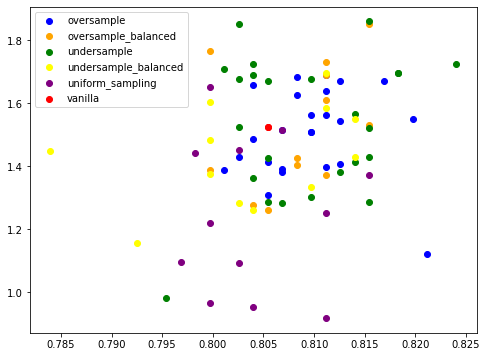

In [ ]:
plt.figure(figsize=(8, 6))
for strategy_type, df in df_results.groupby('strategy_type'): 
    plt.scatter(df['precision@0.1'], df['disparity'], c=color_map[strategy_type], label=strategy_type)
plt.legend(loc=2)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'vanilla'),
  Text(1, 0, 'oversample_fully_funded_1_low_poverty_0'),
  Text(2, 0, 'oversample_fully_funded_0_low_poverty_1'),
  Text(3, 0, 'undersample_fully_funded_0_low_poverty_0'),
  Text(4, 0, 'undersample_fully_funded_1_low_poverty_1'),
  Text(5, 0, 'uniform_sampling'),
  Text(6, 0, 'oversample_fully_funded_balanced'),
  Text(7, 0, 'undersample_fully_funded_balanced')])

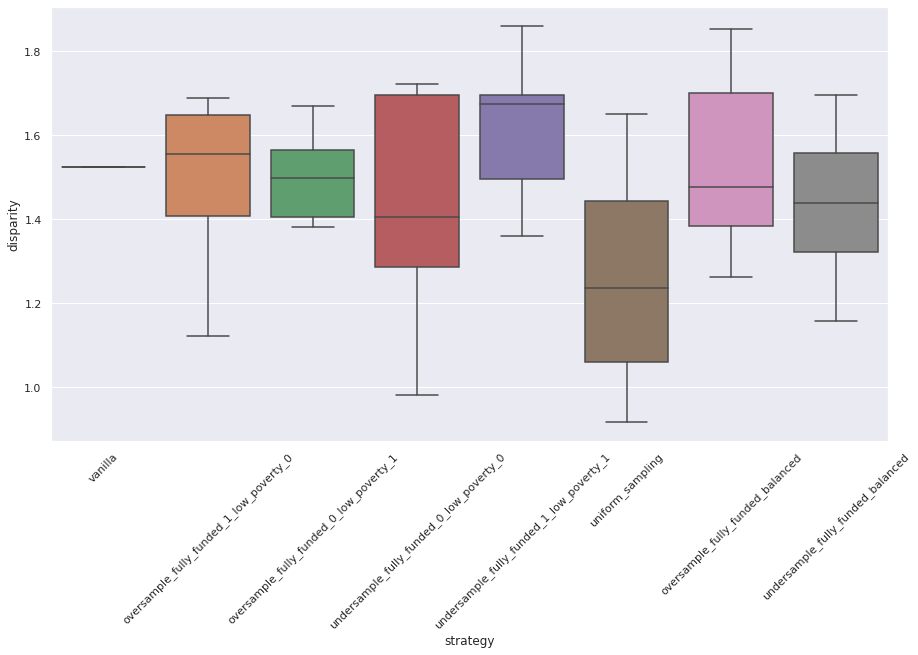

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='strategy', y='disparity', data=df_results)
plt.xticks(rotation=45)

# Finished

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

**Oversampling followed by under sampling**

In [ ]:
over = RandomOverSampler(sampling_strategy=0.85)
under = RandomUnderSampler(sampling_strategy= 1)
pipeline = Pipeline(steps=[('o', over), ('u', under)])
x_train_resampled, Y_train_resampled = under.fit_resample(x_train.values, Y_train.values)
print('after resampling: percentage of 1: not fully funded = {}'.format(np.sum(Y_train_resampled) / np.size(Y_train_resampled)))

after resampling: percentage of 1: not fully funded = 0.5


In [ ]:
under.sample_indices_

array([ 4678,   815, 30567, ..., 37735, 37736, 37737])

/home/mingkaid/miniconda3/envs/10718/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


train_auc_score = 0.99999, validation_auc_score = 0.81318
precision @ k = 0.8054363376251789


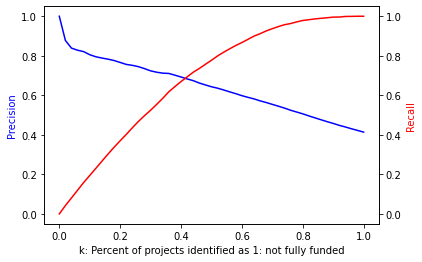

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
clf_rf.fit(x_train_resampled, Y_train_resampled)
y_train_pred =  clf_rf.predict_proba(x_train_resampled)[:,1]
y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
train_auc_score = roc_auc_score(Y_train_resampled,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

In [ ]:
get_fnr_by_group(data_test['poverty_level'], Y_test, y_score)

In [ ]:
data_test['low_poverty_level'] = data_test.poverty_level.apply(lambda x: 'low' if 'low' in x else 'not low')
get_fnr_disparity(data_test['low_poverty_level'], 'low',
                  Y_test, y_score)

**Undersampling followed by oversampling**

In [ ]:
under = RandomUnderSampler(sampling_strategy= 0.85)
over = RandomOverSampler(sampling_strategy=1)
pipeline = Pipeline(steps=[ ('u', under), ('o', over)])
x_train_resampled, Y_train_resampled = pipeline.fit_resample(x_train.values, Y_train.values)
print('after resampling: percentage of 1: not fully funded = {}'.format(np.sum(Y_train_resampled) / np.size(Y_train_resampled)))

after resampling: percentage of 1: not fully funded = 0.5


/home/mingkaid/miniconda3/envs/10718/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


c=50.00000, train_auc_score = 0.99999, validation_auc_score = 0.81396
precision @ k = 0.8140200286123033


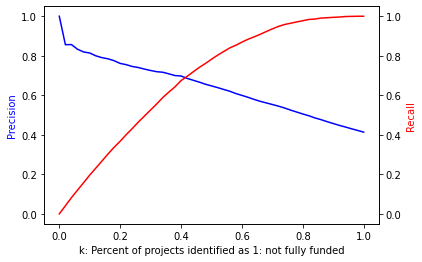

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
clf_rf.fit(x_train_resampled, Y_train_resampled)
y_train_pred =  clf_rf.predict_proba(x_train_resampled)[:,1]
y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
train_auc_score = roc_auc_score(Y_train_resampled,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('c={:.5f}, train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(i,train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

**Undersampling only**

In [ ]:
under = RandomUnderSampler(sampling_strategy= 1.0)
clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
pipeline = Pipeline(steps=[ ('u', under)])
x_train_resampled, Y_train_resampled = pipeline.fit_resample(x_train.values, Y_train.values)
print('after resampling: percentage of 1: not fully funded = {}'.format(np.sum(Y_train_resampled) / np.size(Y_train_resampled)))

after resampling: percentage of 1: not fully funded = 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



c=50.00000, train_auc_score = 0.99998, validation_auc_score = 0.81226
precision @ k = 0.7939914163090128


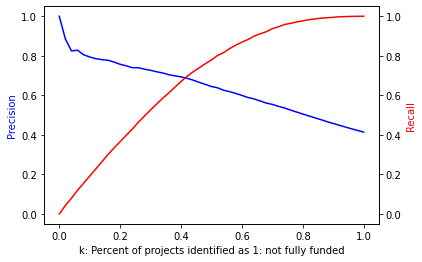

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
clf_rf.fit(x_train_resampled, Y_train_resampled)
y_train_pred =  clf_rf.predict_proba(x_train_resampled)[:,1]
y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
train_auc_score = roc_auc_score(Y_train_resampled,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()

Oversampling only

In [ ]:
over = RandomOverSampler(sampling_strategy=1.0)
clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
pipeline = Pipeline(steps=[ ('u', under), ('o', over)])
x_train_resampled, Y_train_resampled = pipeline.fit_resample(x_train.values, Y_train.values)
print('after resampling: percentage of 1: not fully funded = {}'.format(np.sum(Y_train_resampled) / np.size(Y_train_resampled)))

after resampling: percentage of 1: not fully funded = 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



c=50.00000, train_auc_score = 0.99998, validation_auc_score = 0.81252
precision @ k = 0.8011444921316166


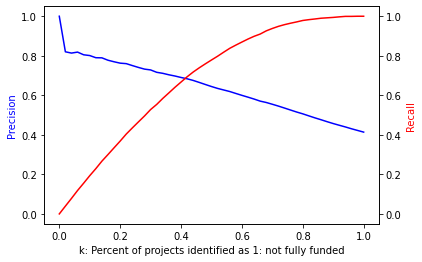

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

clf_rf = RandomForestClassifier(n_estimators = 500, min_samples_split=5, random_state=0)
clf_rf.fit(x_train_resampled, Y_train_resampled)
y_train_pred =  clf_rf.predict_proba(x_train_resampled)[:,1]
y_test_pred =  clf_rf.predict_proba(x_test)[:,1]
train_auc_score = roc_auc_score(Y_train_resampled,y_train_pred)
train_auc.append((train_auc_score))
cv_auc.append(roc_auc_score(Y_test, y_test_pred))
print('train_auc_score = {:.5f}, validation_auc_score = {:.5f}'.format(train_auc_score,roc_auc_score(Y_test, y_test_pred)))

y_score = pd.Series(y_test_pred)
Y_test_np = Y_test.to_numpy()
Y_test_pd = pd.Series(Y_test_np)
combo = pd.concat([Y_test_pd, y_score], axis=1)
combo.columns = ['fully_funded', 'pred']

grid = np.arange(0,1.02,0.02)
pre_log, rec_log = np.zeros_like(grid), np.zeros_like(grid)
for i, k in enumerate(grid):
  pre_log[i], rec_log[i] = prk(combo, k)
  if k == 0.1:
    print('precision @ k = {}'.format(pre_log[i]))

# f, axs = plt.subplots(1,2,figsize=(15,5))
# axs1 = axs[0]
f, axs1 = plt.subplots()
axs2 = axs1.twinx()
axs1.plot(grid, pre_log, 'b', label = 'Precision')
axs2.plot(grid, rec_log, 'r', label = 'Recall')
axs1.set_ylabel('Precision', color = 'b')
axs1.set_ylim(-0.05,1.05)
axs2.set_ylabel('Recall', color = 'r')
axs2.set_ylim(-0.05,1.05)
axs1.set_xlabel('k: Percent of projects identified as 1: not fully funded')
plt.show()